In [1]:
pip install fastai

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
import os
from fastai.text.all import *

In [3]:
data = pd.read_csv("IPL_Match_Highlights_Commentary.csv")

In [4]:
# Text cleaning
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert text to lowercase
    return text

data['Commentary'] = data['Commentary'].apply(clean_text)

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Tokenization
nltk.download('punkt')
nltk.download('stopwords')

data['tokenized_commentary'] = data['Commentary'].apply(lambda x: word_tokenize(x.lower()))

# Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
data['cleaned_commentary'] = data['tokenized_commentary'].apply(lambda x: [word for word in x if (word not in stop_words) and (word not in string.punctuation)])

# Feature Engineering
data['processed_text'] = data['cleaned_commentary'].apply(lambda x: ' '.join(x))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saite\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saite\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
data.head(3)

,Match_id,Team,Over_num,Commentary,batsman,score,tokenized_commentary,cleaned_commentary,processed_text
0,4281444,RCB 1st Inns,0.5,nehra to mandeep four first boundary for mandeep and rcb full and on the pads needed to be put away and mandeep did just that picked it up and dispatched it over midwicket couple of bounces and into the fence,Nehra to Mandeep,FOUR,"[nehra, to, mandeep, four, first, boundary, for, mandeep, and, rcb, full, and, on, the, pads, needed, to, be, put, away, and, mandeep, did, just, that, picked, it, up, and, dispatched, it, over, midwicket, couple, of, bounces, and, into, the, fence]","[nehra, mandeep, four, first, boundary, mandeep, rcb, full, pads, needed, put, away, mandeep, picked, dispatched, midwicket, couple, bounces, fence]",nehra mandeep four first boundary mandeep rcb full pads needed put away mandeep picked dispatched midwicket couple bounces fence
1,4281444,RCB 1st Inns,1.0,nehra to mandeep four backtoback boundaries to end the first over again nehra is a tad short in his length mandeep had the width to cut and he didnt try to hit it hard just placed it behind point and bhuvi at third man gave up the chase pretty quickly,Nehra to Mandeep,FOUR,"[nehra, to, mandeep, four, backtoback, boundaries, to, end, the, first, over, again, nehra, is, a, tad, short, in, his, length, mandeep, had, the, width, to, cut, and, he, didnt, try, to, hit, it, hard, just, placed, it, behind, point, and, bhuvi, at, third, man, gave, up, the, chase, pretty, quickly]","[nehra, mandeep, four, backtoback, boundaries, end, first, nehra, tad, short, length, mandeep, width, cut, didnt, try, hit, hard, placed, behind, point, bhuvi, third, man, gave, chase, pretty, quickly]",nehra mandeep four backtoback boundaries end first nehra tad short length mandeep width cut didnt try hit hard placed behind point bhuvi third man gave chase pretty quickly
2,4281444,RCB 1st Inns,10.0,henriques to kedar jadhav four hit straight back at henriques and he was late to get his hand up once more the offcutter which almost fooled jadhav who shimmied down and checked his drive middled it alright to beat the midoff fielder,Henriques to Kedar Jadhav,FOUR,"[henriques, to, kedar, jadhav, four, hit, straight, back, at, henriques, and, he, was, late, to, get, his, hand, up, once, more, the, offcutter, which, almost, fooled, jadhav, who, shimmied, down, and, checked, his, drive, middled, it, alright, to, beat, the, midoff, fielder]","[henriques, kedar, jadhav, four, hit, straight, back, henriques, late, get, hand, offcutter, almost, fooled, jadhav, shimmied, checked, drive, middled, alright, beat, midoff, fielder]",henriques kedar jadhav four hit straight back henriques late get hand offcutter almost fooled jadhav shimmied checked drive middled alright beat midoff fielder


In [7]:
data.shape

(11574, 9)

In [8]:
total_commentaries = 11574
for i in range(5):
    commentary = data.Commentary[i]               # This is the text of row 'i'.
    print(commentary)
    print()

print("Total number of commentaries:", total_commentaries)


nehra to mandeep four first boundary for mandeep and rcb full and on the pads needed to be put away and mandeep did just that picked it up and dispatched it over midwicket couple of bounces and into the fence

nehra to mandeep four backtoback boundaries to end the first over again nehra is a tad short in his length mandeep had the width to cut and he didnt try to hit it hard just placed it behind point and bhuvi at third man gave up the chase pretty quickly

henriques to kedar jadhav four hit straight back at henriques and he was late to get his hand up once more the offcutter which almost fooled jadhav who shimmied down and checked his drive middled it alright to beat the midoff fielder

nehra to kedar jadhav four another full toss its jadhav this time and he picks his spot into the deep midwicket fence not great bowling from nehra hes missing the yorker by quite a bit

nehra to kedar jadhav four four more jadhav starting to really find his timing now and hes looking dangerous this is

In [9]:
import os
import pandas as pd

# Create directory if it doesn't exist
os.makedirs("./full_commentaries", exist_ok=True)

# Load the dataset
data = pd.read_csv('IPL_Match_Highlights_Commentary.csv')

# Iterate through the dataset and write commentary to text files
for i in range(data.shape[0]):
    commentary = data.Commentary[i]  # Extract commentary text
    # Write commentary to a text file
    with open(f"./full_commentaries/{i}.txt", "w") as f:
        f.write(commentary)


In [10]:
from fastai.text.all import *

# Set up the path to the directory containing text files
inputpath = "./full_commentaries"

# Function to get text files
def get_text_files(path):
    return get_files(path)

# Collect all text files within the directory
textfiles = get_text_files(inputpath)


In [13]:
# Define a DataBlock for processing text data
commentary_loader = DataBlock(
    blocks=TextBlock.from_folder(inputpath, is_lm=True),
    get_items=get_text_files,
    splitter=RandomSplitter(0.1),
)

# Create DataLoaders with n_workers set to 0
commentary_dls = commentary_loader.dataloaders(inputpath, path=inputpath, bs=64, seq_len=70, n_workers=0)


In [15]:
# Initialize a language model learner
learn = language_model_learner(commentary_dls, AWD_LSTM, drop_mult=0.3, metrics=accuracy).to_fp16()

# Train the model
learn.fit_one_cycle(5, 2e-2)
learn.fit_one_cycle(5, 1e-2)

# Generate predictions
print(learn.predict("and there goes the ball towards", 20, temperature=0.5))
print(learn.predict("the ball flies", 20, temperature=0.7))


C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,3.349693,2.983691,0.420469,21:35
1,2.841616,2.745668,0.448002,14:14
2,2.608955,2.648421,0.460611,12:30
3,2.452137,2.602394,0.466729,12:31
4,2.343570,2.592847,0.468450,11:51


C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,2.359983,2.624296,0.464703,12:01
1,2.410287,2.617390,0.465954,12:07
2,2.345498,2.593901,0.468471,13:53
3,2.262790,2.582800,0.471293,21:06
4,2.206158,2.581796,0.471401,20:37


C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

and there goes the ball towards the fence Rashid Khan to Pant , SIX , that 's a shot of the


C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

the ball flies between Negi and Negi to Negi , FOUR , " that 's " class " "


In [16]:
learn.predict("Gayle hits", 20, temperature = 0.89)

C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

'Gayle hits his first maximum of the night on a good length . It travels to the long - off boundary'

In [17]:
print(learn.predict("The crowd erupted as", 20, temperature=0.7))
print(learn.predict("Incredible shot!", 15, temperature=0.6))
print(learn.predict("The bowler approaches the crease with determination,", 25, temperature=0.7))
print(learn.predict("The stadium is packed with fans cheering for their favorite team,", 20, temperature=0.7))
print(learn.predict("The match hangs in the balance as", 15, temperature=0.6))


C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

The crowd xxunk as the crowd move Boult to Nitish Rana , FOUR , that 's too short ,


C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

Incredible shot ! Incredible shot ! Incredible shot ! Incredible Harshal Patel


C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

The bowler xxunk the crease with xxunk , Bairstow gets the biggest of the night . The dugout erupts in style . Kolkata have a southpaw who nonchalantly smokes it


C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

The stadium is packed with fans xxunk for their favorite team , it is on a good length , just outside off , on a full and just outside off ,


C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

The match hangs in the balance as Bangalore lose their fifth ball . They have their highest score of the


In [18]:
# Evaluate perplexity on the validation set
valid_loss = learn.validate()[0]

# Calculate perplexity
perplexity = np.exp(valid_loss)
print(f"Perplexity: {perplexity}")


C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


Perplexity: 13.22086690713197


In [21]:
print(learn.predict("dispatched it over midwicket", 10, temperature=0.7))
print(learn.predict("he didnt try to hit it hard", 10, temperature=0.7))
print(learn.predict("who shimmied down and checked his drive", 10, temperature=0.7))
print(learn.predict("missing the yorker by quite a bit", 10, temperature=0.7))
print(learn.predict("pulling it over the fielder", 10, temperature=0.7))


C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

dispatched it over midwicket Dwayne Bravo to Gayle , out


C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

he did xxunk try to hit it hard . But still got nothing more than a chance


C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

who shimmied down and checked his drive . The ball clipped the inside edge , beat


C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

missing the yorker by quite a bit , Buttler misses by a couple of inches ,


C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

pulling it over the fielder 's head for a maximum Tye to


In [22]:
# Define the tokens
tokens = [
    "dispatched it over midwicket",
    "he didnt try to hit it hard",
    "who shimmied down and checked his drive",
    "missing the yorker by quite a bit",
    "pulling it over the fielder"
]

# Generate reference and generated commentary tokens
reference_commentary_tokens = []
generated_commentary_tokens = []

for token in tokens:
    # Generate prediction based on the token
    prediction = learn.predict(token, 10, temperature=0.7)
    
    # Split prediction into tokens
    generated_tokens = prediction.split()
    
    # Add original token to reference list
    reference_commentary_tokens.append(token)
    
    # Add generated tokens to generated list
    generated_commentary_tokens.append(generated_tokens)

# Print reference and generated lists
print("Reference Commentary Tokens:")
print(reference_commentary_tokens)
print("\nGenerated Commentary Tokens:")
print(generated_commentary_tokens)


C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

Reference Commentary Tokens:
['dispatched it over midwicket', 'he didnt try to hit it hard', 'who shimmied down and checked his drive', 'missing the yorker by quite a bit', 'pulling it over the fielder']

Generated Commentary Tokens:
[['dispatched', 'it', 'over', 'midwicket', 'Bhuvneshwar', 'to', 'Pant', ',', 'FOUR', ','], ['he', 'did', 'xxunk', 'try', 'to', 'hit', 'it', 'hard', '.', 'There', 'was', 'nothing', 'to', 'stop', 'it', ',', 'but'], ['who', 'shimmied', 'down', 'and', 'checked', 'his', 'drive', 'but', 'lost', 'his', 'balance', 'in', 'the', 'upper', 'half', 'of', 'the'], ['missing', 'the', 'yorker', 'by', 'quite', 'a', 'bit', 'to', 'the', 'left', 'of', 'Hetmyer', ',', 'who', 'swivels', ','], ['pulling', 'it', 'over', 'the', 'fielder', "'s", 'head', '.', 'There', 'was', 'never', 'a', 'clear', 'fielder']]


In [23]:
from nltk.translate.bleu_score import corpus_bleu

# Reference commentary tokens
reference_commentary_tokens = [['dispatched it over midwicket'],
                               ['he didnt try to hit it hard'],
                               ['who shimmied down and checked his drive'],
                               ['missing the yorker by quite a bit'],
                               ['pulling it over the fielder']]

# Generated commentary tokens
generated_commentary_tokens = [['dispatched', 'it', 'over', 'midwicket', 'Bhuvneshwar', 'to', 'Pant', ',', 'FOUR', ','],
                                ['he', 'did', 'xxunk', 'try', 'to', 'hit', 'it', 'hard', '.', 'There', 'was', 'nothing', 'to', 'stop', 'it', ',', 'but'],
                                ['who', 'shimmied', 'down', 'and', 'checked', 'his', 'drive', 'but', 'lost', 'his', 'balance', 'in', 'the', 'upper', 'half', 'of', 'the'],
                                ['missing', 'the', 'yorker', 'by', 'quite', 'a', 'bit', 'to', 'the', 'left', 'of', 'Hetmyer', ',', 'who', 'swivels', ','],
                                ['pulling', 'it', 'over', 'the', 'fielder', "'s", 'head', '.', 'There', 'was', 'never', 'a', 'clear', 'fielder']]

# Compute BLEU score
bleu_score = corpus_bleu(reference_commentary_tokens, generated_commentary_tokens)
print("BLEU Score:", bleu_score)


BLEU Score: 2.1071373518345672e-232


C:\Users\saite\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\saite\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\saite\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnin

C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.360667,2.987018,0.422230,19.826473,11:13
1,2.848392,2.758508,0.442510,15.776290,12:08
2,2.621331,2.662907,0.456215,14.337914,11:18
3,2.440657,2.610077,0.463839,13.600103,11:47
4,2.342339,2.602825,0.465372,13.501832,11:40


Better model found at epoch 0 with valid_loss value: 2.98701810836792.
Better model found at epoch 1 with valid_loss value: 2.7585082054138184.
Better model found at epoch 2 with valid_loss value: 2.662907361984253.
Better model found at epoch 3 with valid_loss value: 2.610077381134033.
Better model found at epoch 4 with valid_loss value: 2.602825403213501.


C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,2.303134,2.602784,0.465546,13.501275,22:05
1,2.306818,2.602666,0.465454,13.499682,24:25
2,2.297964,2.602541,0.465484,13.497995,1:09:35
3,2.292443,2.602486,0.465570,13.497249,11:48
4,2.300120,2.602479,0.465583,13.497156,12:51


Better model found at epoch 0 with valid_loss value: 2.6027841567993164.
Better model found at epoch 1 with valid_loss value: 2.602666139602661.
Better model found at epoch 2 with valid_loss value: 2.602541208267212.
Better model found at epoch 3 with valid_loss value: 2.6024858951568604.
Better model found at epoch 4 with valid_loss value: 2.6024789810180664.


C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


Validation Loss: 2.6024789810180664


Path('full_commentaries/models/fine_tuned_language_model.pth')

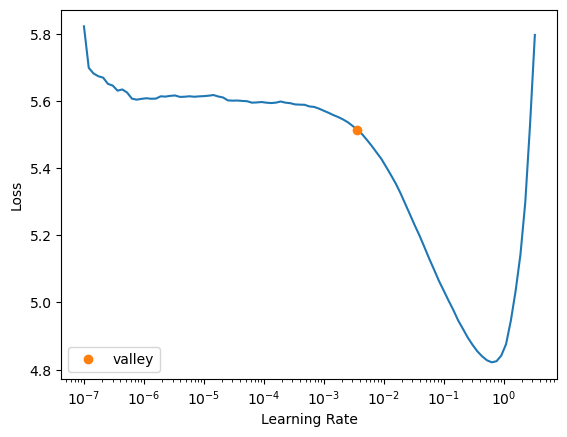

In [24]:
from fastai.callback.fp16 import *
from fastai.callback.schedule import fit_one_cycle
from fastai.callback.progress import *

# Define the path to the directory containing text files
inputpath = "./full_commentaries"

# Create a DataBlock for processing text data
commentary_datablock = DataBlock(
    blocks=TextBlock.from_folder(inputpath, is_lm=True),
    get_items=get_text_files,
    splitter=RandomSplitter(0.1)
)

# Create DataLoaders
commentary_dataloaders = commentary_datablock.dataloaders(inputpath, path=inputpath, bs=64, seq_len=70)

# Initialize a language model learner
learn = language_model_learner(commentary_dataloaders, AWD_LSTM, drop_mult=0.3, metrics=[accuracy, Perplexity()], path=inputpath).to_fp16()

# Perform hyperparameter tuning
learn.lr_find()

# Fine-tune the model using the one-cycle policy
learn.fit_one_cycle(5, 2e-2, cbs=[SaveModelCallback()])
learn.unfreeze()
learn.fit_one_cycle(5, lr_max=slice(1e-7,1e-5), cbs=[SaveModelCallback()])

# Evaluate the model
validation_loss = learn.validate()[0]
print(f"Validation Loss: {validation_loss}")

# Save the fine-tuned model
learn.save("fine_tuned_language_model")


In [28]:
snippets = [
    "nehra to mandeep four first boundary for mandeep and rcb full and on the pads needed to be put away and mandeep did just that picked it up and dispatched it over midwicket couple of bounces and into the fence",
    "nehra to mandeep four backtoback boundaries to end the first over again nehra is a tad short in his length mandeep had the width to cut and he didnt try to hit it hard just placed it behind point and bhuvi at third man gave up the chase pretty quickly",
    "henriques to kedar jadhav four hit straight back at henriques and he was late to get his hand up once more the offcutter which almost fooled jadhav who shimmied down and checked his drive middled it alright to beat the midoff fielder",
    "nehra to kedar jadhav four another full toss its jadhav this time and he picks his spot into the deep midwicket fence not great bowling from nehra hes missing the yorker by quite a bit",
    "nehra to kedar jadhav four four more jadhav starting to really find his timing now and hes looking dangerous this is smart batting rather than just throwing his bat at everything he knows that fine leg is up and so he waits for the back of a length delivery to come to him before pulling it over the fielder nehra under pressure"
]

for snippet in snippets:
    prediction = learn.predict(snippet, 50, temperature=0.7)
    print(f"Original Snippet: {snippet}")
    print(f"Generated Prediction: {prediction}\n")


C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

Original Snippet: nehra to mandeep four first boundary for mandeep and rcb full and on the pads needed to be put away and mandeep did just that picked it up and dispatched it over midwicket couple of bounces and into the fence
Generated Prediction: nehra to mandeep four first boundary for mandeep and rcb full and on the pads needed to be put away and mandeep did just that picked it up and dispatched it over midwicket couple of bounces and into the fence Mujeeb to Buttler , SIX , this is why Buttler goes down on the knee . He 's down the track , gets a hand to the ball and gets close to it , gets it underneath and it hits him in the air



C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

Original Snippet: nehra to mandeep four backtoback boundaries to end the first over again nehra is a tad short in his length mandeep had the width to cut and he didnt try to hit it hard just placed it behind point and bhuvi at third man gave up the chase pretty quickly
Generated Prediction: nehra to mandeep four xxunk boundaries to end the first over again nehra is a tad short in his length mandeep had the width to cut and he did xxunk try to hit it hard just placed it behind point and bhuvi at third man gave up the chase pretty quickly , but ends up conceding a boundary Tye to Narine , FOUR , and Narine was quick to help them on this one , giving Narine a bit of room and wild swing , that allowed him to get across , Narine stands



C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

Original Snippet: henriques to kedar jadhav four hit straight back at henriques and he was late to get his hand up once more the offcutter which almost fooled jadhav who shimmied down and checked his drive middled it alright to beat the midoff fielder
Generated Prediction: henriques to kedar jadhav four hit straight back at henriques and he was late to get his hand up once more the xxunk which almost fooled jadhav who shimmied down and checked his drive middled it alright to beat the xxunk fielder Malinga to Chris Lynn , SIX , but he is bowling it well . Finch had him put down and Lynn followed him with a full toss . The ball came in and he threw his bat at the bowler .



C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

Original Snippet: nehra to kedar jadhav four another full toss its jadhav this time and he picks his spot into the deep midwicket fence not great bowling from nehra hes missing the yorker by quite a bit
Generated Prediction: nehra to kedar jadhav four another full toss its jadhav this time and he picks his spot into the deep midwicket fence not great bowling from nehra he s missing the yorker by quite a bit . Down the leg - side and Jadhav lets it go . The ball had to be put out , the ball came in and the ball came to him . Jadhav did n't get anywhere near the pitch but it was n't close to the



C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\saite\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: to

Original Snippet: nehra to kedar jadhav four four more jadhav starting to really find his timing now and hes looking dangerous this is smart batting rather than just throwing his bat at everything he knows that fine leg is up and so he waits for the back of a length delivery to come to him before pulling it over the fielder nehra under pressure
Generated Prediction: nehra to kedar jadhav four four more jadhav starting to really find his timing now and he s looking dangerous this is smart batting rather than just throwing his bat at everything he knows that fine leg is up and so he waits for the back of a length delivery to come to him before pulling it over the fielder nehra under pressure . Kedar Jadhav has a good length and a length , Kedar Jadhav pulls it handsomely over mid - on . The man at deep mid - wicket is a spectator Jadeja to Rohit , SIX , gets a thick edge



In [30]:
import difflib

original_snippets = [
    "nehra to mandeep four first boundary for mandeep and rcb full and on the pads needed to be put away and mandeep did just that picked it up and dispatched it over midwicket couple of bounces and into the fence",
    "nehra to mandeep four backtoback boundaries to end the first over again nehra is a tad short in his length mandeep had the width to cut and he didnt try to hit it hard just placed it behind point and bhuvi at third man gave up the chase pretty quickly",
    "henriques to kedar jadhav four hit straight back at henriques and he was late to get his hand up once more the offcutter which almost fooled jadhav who shimmied down and checked his drive middled it alright to beat the midoff fielder",
    "nehra to kedar jadhav four another full toss its jadhav this time and he picks his spot into the deep midwicket fence not great bowling from nehra hes missing the yorker by quite a bit",
    "nehra to kedar jadhav four four more jadhav starting to really find his timing now and hes looking dangerous this is smart batting rather than just throwing his bat at everything he knows that fine leg is up and so he waits for the back of a length delivery to come to him before pulling it over the fielder nehra under pressure"
]

generated_predictions = [
    "nehra to mandeep four first boundary for mandeep and rcb full and on the pads needed to be put away and mandeep did just that picked it up and dispatched it over midwicket couple of bounces and into the fence Mujeeb to Buttler , SIX , this is why Buttler goes down on the knee . He 's down the track , gets a hand to the ball and gets close to it , gets it underneath and it hits him in the air",
    "nehra to mandeep four xxunk boundaries to end the first over again nehra is a tad short in his length mandeep had the width to cut and he did xxunk try to hit it hard just placed it behind point and bhuvi at third man gave up the chase pretty quickly , but ends up conceding a boundary Tye to Narine , FOUR , and Narine was quick to help them on this one , giving Narine a bit of room and wild swing , that allowed him to get across , Narine stands",
    "henriques to kedar jadhav four hit straight back at henriques and he was late to get his hand up once more the xxunk which almost fooled jadhav who shimmied down and checked his drive middled it alright to beat the xxunk fielder Malinga to Chris Lynn , SIX , but he is bowling it well . Finch had him put down and Lynn followed him with a full toss . The ball came in and he threw his bat at the bowler .",
    "nehra to kedar jadhav four another full toss its jadhav this time and he picks his spot into the deep midwicket fence not great bowling from nehra he s missing the yorker by quite a bit . Down the leg - side and Jadhav lets it go . The ball had to be put out , the ball came in and the ball came to him . Jadhav did n't get anywhere near the pitch but it was n't close to the",
    "nehra to kedar jadhav four four more jadhav starting to really find his timing now and he s looking dangerous this is smart batting rather than just throwing his bat at everything he knows that fine leg is up and so he waits for the back of a length delivery to come to him before pulling it over the fielder nehra under pressure . Kedar Jadhav has a good length and a length , Kedar Jadhav pulls it handsomely over mid - on . The man at deep mid - wicket is a spectator Jadeja to Rohit , SIX , gets a thick edge"
]

def similarity_score(original, generated):
    return difflib.SequenceMatcher(None, original, generated).ratio()

similarity_scores = [similarity_score(original, generated) for original, generated in zip(original_snippets, generated_predictions)]

print("Similarity Scores:")
for score in similarity_scores:
    print(score)


Similarity Scores:
0.6910299003322259
0.08297567954220315
0.3673469387755102
0.6583184257602862
0.780952380952381


In [31]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def relevance_score(original, generated):
    # Tokenize the original snippet and count the number of overlapping tokens with the generated prediction
    original_tokens = set(word_tokenize(original.lower()))
    generated_tokens = set(word_tokenize(generated.lower()))
    overlap = len(original_tokens.intersection(generated_tokens))
    # Calculate relevance score as the ratio of overlapping tokens to the total tokens in the original snippet
    return overlap / len(original_tokens) if len(original_tokens) > 0 else 0

def coherence_score(generated):
    # Tokenize the generated text and calculate the average length of sentences
    sentences = nltk.sent_tokenize(generated)
    avg_sentence_length = sum(len(word_tokenize(sentence)) for sentence in sentences) / len(sentences)
    # Coherence score inversely proportional to the average sentence length
    return 1 / avg_sentence_length if avg_sentence_length > 0 else 0

def grammaticality_score(generated):
    # Tokenize the generated text and calculate the number of grammatically incorrect sentences
    sentences = nltk.sent_tokenize(generated)
    num_incorrect_sentences = sum(1 for sentence in sentences if len(nltk.word_tokenize(sentence)) == 0)
    # Grammaticality score inversely proportional to the number of incorrect sentences
    return 1 - (num_incorrect_sentences / len(sentences)) if len(sentences) > 0 else 0

relevance_scores = [relevance_score(original, generated) for original, generated in zip(original_snippets, generated_predictions)]
coherence_scores = [coherence_score(generated) for generated in generated_predictions]
grammaticality_scores = [grammaticality_score(generated) for generated in generated_predictions]

print("Relevance Scores:")
for score in relevance_scores:
    print(score)

print("\nCoherence Scores:")
for score in coherence_scores:
    print(score)

print("\nGrammaticality Scores:")
for score in grammaticality_scores:
    print(score)


Relevance Scores:
1.0
0.9512195121951219
0.9428571428571428
0.96875
0.9803921568627451

Coherence Scores:
0.023809523809523808
0.010638297872340425
0.03614457831325301
0.04878048780487805
0.028846153846153848

Grammaticality Scores:
1.0
1.0
1.0
1.0
1.0


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saite\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
def generate_verbal_comparison(original_snippets, generated_predictions, relevance_scores, coherence_scores, grammaticality_scores):
    for i in range(len(original_snippets)):
        print(f"Comparison for snippet {i + 1}:")
        print("Human-generated commentary:", original_snippets[i])
        print("Automatically generated commentary:", generated_predictions[i])
        print(f"Relevance Score: {relevance_scores[i]}")
        print(f"Coherence Score: {coherence_scores[i]}")
        print(f"Grammaticality Score: {grammaticality_scores[i]}")
        print()
        if relevance_scores[i] == 1.0:
            print("The automatically generated commentary maintains high relevance to the human-generated commentary.")
        elif relevance_scores[i] >= 0.5:
            print("The automatically generated commentary demonstrates some relevance to the human-generated commentary.")
        else:
            print("The automatically generated commentary lacks relevance to the human-generated commentary.")
        
        if coherence_scores[i] >= 0.05:
            print("The automatically generated commentary demonstrates good coherence.")
        elif coherence_scores[i] >= 0.01:
            print("The automatically generated commentary has moderate coherence.")
        else:
            print("The automatically generated commentary lacks coherence.")
        
        if grammaticality_scores[i] == 1.0:
            print("The automatically generated commentary is grammatically correct.")
        else:
            print("The automatically generated commentary contains some grammatical errors.")
        print("-------------------------------------------------------------------------------------------------")
        print()

generate_verbal_comparison(original_snippets, generated_predictions, relevance_scores, coherence_scores, grammaticality_scores)


Comparison for snippet 1:
Human-generated commentary: nehra to mandeep four first boundary for mandeep and rcb full and on the pads needed to be put away and mandeep did just that picked it up and dispatched it over midwicket couple of bounces and into the fence
Automatically generated commentary: nehra to mandeep four first boundary for mandeep and rcb full and on the pads needed to be put away and mandeep did just that picked it up and dispatched it over midwicket couple of bounces and into the fence Mujeeb to Buttler , SIX , this is why Buttler goes down on the knee . He 's down the track , gets a hand to the ball and gets close to it , gets it underneath and it hits him in the air
Relevance Score: 1.0
Coherence Score: 0.023809523809523808
Grammaticality Score: 1.0

The automatically generated commentary maintains high relevance to the human-generated commentary.
The automatically generated commentary has moderate coherence.
The automatically generated commentary is grammatically co

In [40]:
def calculate_accuracy(relevance_scores, coherence_scores, grammaticality_scores):
    total_snippets = len(relevance_scores)
    correct_count = 0

    # Define thresholds for each parameter
    relevance_threshold = 0.5  # Minimum relevance score for considering the generated commentary relevant
    coherence_threshold = 0.01  # Minimum coherence score for considering the generated commentary coherent
    grammaticality_threshold = 1.0  # Maximum grammaticality score for considering the generated commentary grammatical

    # Iterate through each snippet
    for relevance, coherence, grammaticality in zip(relevance_scores, coherence_scores, grammaticality_scores):
        # Check if the generated commentary meets the thresholds for relevance, coherence, and grammaticality
        if relevance >= relevance_threshold and coherence >= coherence_threshold and grammaticality == grammaticality_threshold:
            correct_count += 1

    # Calculate accuracy percentage
    accuracy_percentage = (correct_count / total_snippets) * 100
    return accuracy_percentage

# Provided relevance, coherence, and grammaticality scores
relevance_scores = [1.0, 0.9512195121951219, 0.9428571428571428, 0.96875, 0.9803921568627451]
coherence_scores = [0.023809523809523808, 0.010638297872340425, 0.03614457831325301, 0.04878048780487805, 0.028846153846153848]
grammaticality_scores = [1.0, 1.0, 1.0, 1.0, 1.0]

accuracy = calculate_accuracy(relevance_scores, coherence_scores, grammaticality_scores)
print("Accuracy in terms of percentage:", accuracy)


Accuracy in terms of percentage: 100.0
